In [3]:
import openml
from gplearn.genetic import SymbolicTransformer, SymbolicRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
dataset = openml.datasets.get_dataset(1028)

X, y, _, _ = dataset.get_data(dataset_format="dataframe", target=dataset.default_target_attribute)

X.head()

,In1,In2,In3,In4,In5,In6,In7,In8,In9,In10
0,2,1,1,2,1,1,2,2,1,1
1,1,2,3,3,2,1,3,1,3,3
2,3,3,2,1,2,2,3,3,3,3
3,2,3,4,2,4,2,2,2,1,2
4,1,2,1,2,2,2,2,1,1,2


In [5]:
y.head()

0    2
1    5
2    5
3    5
4    3
Name: Out1, dtype: uint8

In [6]:
function_set = ['add', 'sub', 'mul', 'div',
                'sqrt', 'log', 'abs', 'neg', 'inv',
                'max', 'min']
transformer = SymbolicTransformer(generations=20,
                                  population_size=6000,
                                  hall_of_fame=100,
                                  n_components=5,
                                  function_set=function_set,
                                  parsimony_coefficient=0.0001,
                                  max_samples=0.3,
                                  verbose=1,
                                  random_state=42,
                                  n_jobs=-1)

transformer.fit(X, y)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    11.66         0.227991        4          0.61506         0.526899     32.78s
   1     9.51         0.405627        6         0.661789         0.500466     43.68s
   2     8.95          0.45818       13          2.22995          1.21726     49.39s


SymbolicTransformer(function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log',
                                  'abs', 'neg', 'inv', 'max', 'min'],
                    max_samples=0.3, n_components=5, n_jobs=-1,
                    parsimony_coefficient=0.0001, population_size=6000,
                    random_state=42, verbose=1)

In [7]:
X_transformed = transformer.transform(X)
X = np.hstack((X, X_transformed))
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,0.003967,-1.386294,5.0,1.693147,1.047852
1,1.0,2.0,3.0,3.0,2.0,1.0,3.0,1.0,3.0,3.0,0.004185,-3.295837,99.0,2.703778,1.177734
2,3.0,3.0,2.0,1.0,2.0,2.0,3.0,3.0,3.0,3.0,0.004196,-3.091042,48.0,2.901136,1.268555
3,2.0,3.0,4.0,2.0,4.0,2.0,2.0,2.0,1.0,2.0,0.004154,-3.688879,96.0,2.887479,1.338867
4,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,0.004066,-2.197225,14.0,2.333007,0.832520


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
function_set = ['add', 'sub', 'mul', 'div',
                'sqrt', 'log', 'abs', 'neg', 'inv',
                'max', 'min']
est_gp = SymbolicRegressor(
    population_size=5000,
    generations=20,
    p_crossover=0.6,
    p_subtree_mutation=0.1,
    p_hoist_mutation=0.2,
    p_point_mutation=0.1,
    max_samples=0.5,
    function_set=function_set,
    verbose=1,
    tournament_size=20,
    parsimony_coefficient=0.001,
    stopping_criteria=0.01,
    metric='mse',
    n_jobs=-1,
    random_state=42
)

est_gp.fit(X_train, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    11.13      4.13597e+09        6         0.473772         0.439246      9.36s
   1     8.92          2244.81       30         0.395155         0.479454     36.88s
   2    11.31          9307.57       10         0.388278         0.420786     40.58s
   3    15.65          40804.9       18         0.360991         0.446073     38.51s
   4    14.78           516.39       13         0.357025         0.453401     41.82s
   5     9.53          49046.9        7          0.35403         0.471565     42.36s
   6     8.00          261.835       16         0.337987         0.476882     32.59s
   7     9.01          262.661       14         0.320953         0.499581     29.00s
   8     9.57          292.805       18         0.331886         0.480631  

SymbolicRegressor(function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log',
                                'abs', 'neg', 'inv', 'max', 'min'],
                  max_samples=0.5, metric='mse', n_jobs=-1, p_crossover=0.6,
                  p_hoist_mutation=0.2, p_point_mutation=0.1,
                  p_subtree_mutation=0.1, population_size=5000, random_state=42,
                  stopping_criteria=0.01, verbose=1)

In [10]:
y_pred_train = pd.Series(est_gp.predict(X_train), index=X_train.index)
y_pred_train.head()

541    4.394449
440    4.094345
482    4.094345
422    4.276666
778    4.394449
dtype: float64

In [11]:
y_train.head()

541    4
440    5
482    4
422    4
778    3
Name: Out1, dtype: uint8

In [12]:
y_pred_test = pd.Series(est_gp.predict(X_test), index=X_test.index)
y_pred_test.head()

521    4.595120
737    3.827572
740    3.988984
660    4.078870
411    2.740999
dtype: float64

In [13]:
y_test.head()

521    5
737    4
740    4
660    3
411    3
Name: Out1, dtype: uint8

In [14]:
print("R2 Score of train samples whit the model: ", est_gp.score(X_train, y_train))
print("R2 Score of test samples whit the model: ", est_gp.score(X_test, y_test))

R2 Score of train samples whit the model:  0.3747253954808426
R2 Score of test samples whit the model:  0.26529353660739174


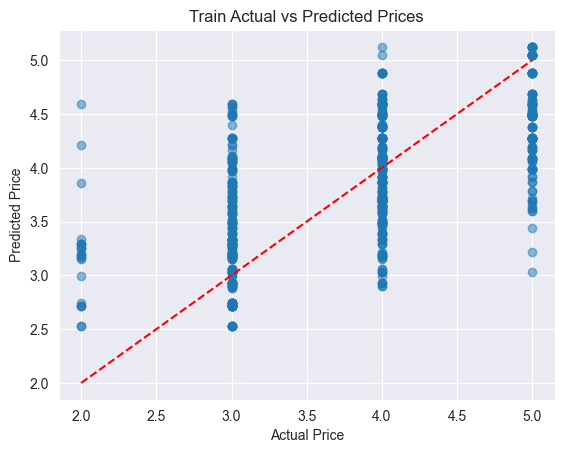

In [15]:
plt.scatter(y_train, y_pred_train, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Train Actual vs Predicted Prices')
plt.show()

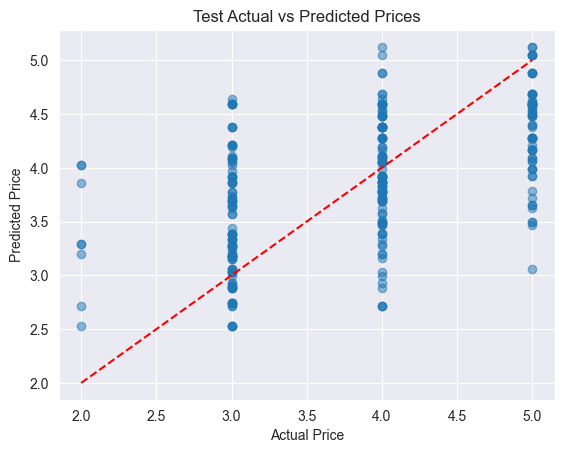

In [16]:
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Test Actual vs Predicted Prices')
plt.show()

In [ ]:
X, y = load_diabetes(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

r = EvolutionaryForestRegressor(max_height=3, normalize=True, select='AutomaticLexicase',
                                gene_num=10, boost_size=100, n_gen=20, n_pop=200, cross_pb=1,
                                base_learner='Random-DT', verbose=True)

r.fit(x_train, y_train)
print(r2_score(y_test, r.predict(x_test)))